In [1]:
#Program 1
#Latihan dasar Pyspark
from pyspark.sql import SparkSession

#Memulai spark session
spark = SparkSession.builder.appName("Latihan Big Data").getOrCreate()

#Membuat dataframe sederhana
data = [
    ("Ali", 34, "Programer", "Main Roblox", "Laki-laki" ),
    ("Budi", 23, "Manajer", "Membaca buku", "Laki-laki"),
    ("Citra", 29, "Desainer Baju", "Memasak", "Perempuan"),
    ("Dina", 45, "Owner Salon", "Bersepeda", "Perempuan")
    ]
kolom = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, kolom)

#Menampilkan dataframe
df.show()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/09/02 19:58:38 WARN Utils: Your hostname, Ubuntu, resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
25/09/02 19:58:38 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/02 19:58:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
                                                                                

+-----+----+-------------+------------+---------+
| Nama|Usia|    Pekerjaan|        Hobi|   Gender|
+-----+----+-------------+------------+---------+
|  Ali|  34|    Programer| Main Roblox|Laki-laki|
| Budi|  23|      Manajer|Membaca buku|Laki-laki|
|Citra|  29|Desainer Baju|     Memasak|Perempuan|
| Dina|  45|  Owner Salon|   Bersepeda|Perempuan|
+-----+----+-------------+------------+---------+



In [2]:
#Program 2
from pyspark.sql import SparkSession

#Memulai Spark Session
spark = SparkSession.builder.appName("Latihan Big Data").getOrCreate()

#Membuat dataframe sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
kolom = ["Nama", "Usia"]
df = spark.createDataFrame(data, kolom)

#Menampilkan Dataframe
df.show()

#Filtering Data
df_filter = df.filter(df['Usia'] > 23)
df_filter.show()

#Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

#Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
|Citra|  29|
| Dina|  45|
+-----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



In [3]:
#Program 3
import pandas as pd

#Membuat dataframe dari pandas
data_pandas = {
    "Nama": ["Hammam", "Hakkan", "Assep", "Rama"],
    "Usia": [19, 18, 20, 20],
    "Tempat Tinggal": ["Solo", "Gunung Kidul", "Jakarta", "Temanggung"]
    }
df_pandas = pd.DataFrame(data_pandas)

#Menampilkan dataframe pandas
df_pandas

#Memfilter data berdasarkan usia
df_filtered = df_pandas[df_pandas['Usia'] < 20 ]
df_filtered

,Nama,Usia,Tempat Tinggal
0,Hammam,19,Solo
1,Hakkan,18,Gunung Kidul


     Nama  Usia             Pekerjaan
0  Hammam    19               Manajer
1  Hakkan    18             Programer
2   Assep    20  Full Stack Developer
3    Rama    20       Software Tester
            Usia
count   4.000000
mean   19.250000
std     0.957427
min    18.000000
25%    18.750000
50%    19.500000
75%    20.000000
max    20.000000


<function matplotlib.pyplot.show(close=None, block=None)>

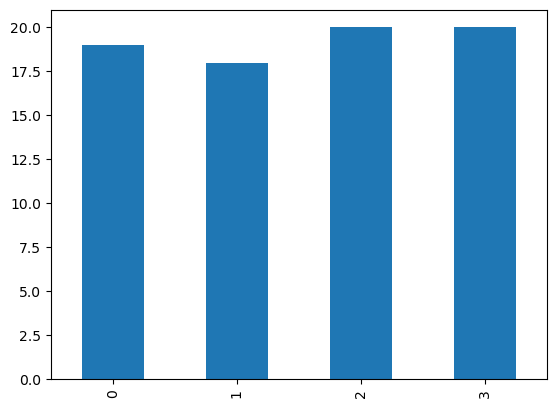

In [4]:
#Program 4
import pandas as pd

#Membuat dataframe pandas
data_pandas = {
    "Nama": ["Hammam", "Hakkan", "Assep", "Rama"],
    "Usia": [19, 18, 20, 20]
    }
df_pandas = pd.DataFrame(data_pandas)

#Membuat dataframe  kedua
data_pandas_2 = {
    "Nama": ["Hammam", "Hakkan", "Assep", "Rama"],
    "Pekerjaan": ["Manajer", "Programer", "Full Stack Developer", "Software Tester"]
    }
df_pandas_2 = pd.DataFrame(data_pandas_2)

#Join antara dua dataframe
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

#Menghitung statistik deskriptif
print(df_pandas.describe())

#Plotting data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show

+------+----+
|  Nama|Usia|
+------+----+
|Hammam|  19|
|Hakkan|  18|
| Assep|  20|
|  Rama|  20|
+------+----+

+------+----+
|  Nama|Usia|
+------+----+
|Hammam|  19|
|Hakkan|  18|
+------+----+

+---------+
|avg(Usia)|
+---------+
|    19.25|
+---------+

+------+----+
|  Nama|Usia|
+------+----+
| Assep|  20|
|  Rama|  20|
|Hammam|  19|
|Hakkan|  18|
+------+----+

     Nama  Usia             Pekerjaan
0  Hammam    19               Manajer
1  Hakkan    18             Programer
2   Assep    20  Full Stack Developer
3    Rama    20       Software Tester
            Usia
count   4.000000
mean   19.250000
std     0.957427
min    18.000000
25%    18.750000
50%    19.500000
75%    20.000000
max    20.000000
+------+----+
|  Nama|Usia|
+------+----+
|Hammam|  19|
|Hakkan|  18|
| Assep|  20|
|  Rama|  20|
+------+----+



(     Nama  Usia
 0  Hammam    19
 1  Hakkan    18
 2   Assep    20
 3    Rama    20,
 None)

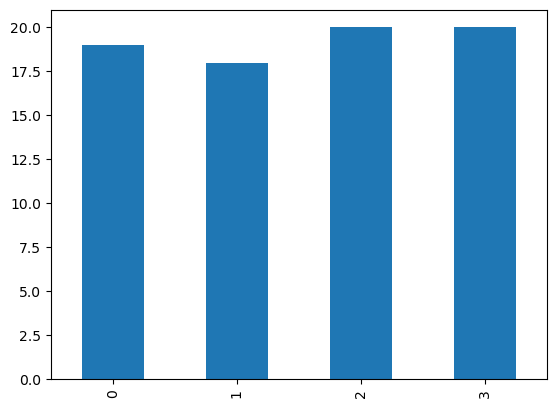

In [5]:
#Program 5
from pyspark.sql import SparkSession

#Memulai Spark Session
spark = SparkSession.builder.appName("Latihan Big Data").getOrCreate()

#Membuat dataframe sederhana
data = [("Hammam", 19), ("Hakkan", 18), ("Assep", 20), ("Rama", 20)]
kolom = ["Nama", "Usia"]
df = spark.createDataFrame(data, kolom)

#Menampilkan Dataframe
df.show()

#Filtering Data
df_filter = df.filter(df['Usia'] < 20)
df_filter.show()

#Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

#Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

import pandas as pd

#Membuat dataframe pandas
data_pandas = {
    "Nama": ["Hammam", "Hakkan", "Assep", "Rama"],
    "Usia": [19, 18, 20, 20]
    }
df_pandas = pd.DataFrame(data_pandas)

#Membuat dataframe  kedua
data_pandas_2 = {
    "Nama": ["Hammam", "Hakkan", "Assep", "Rama"],
    "Pekerjaan": ["Manajer", "Programer", "Full Stack Developer", "Software Tester"]
    }
df_pandas_2 = pd.DataFrame(data_pandas_2)

#Join antara dua dataframe
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

#Menghitung statistik deskriptif
print(df_pandas.describe())

#Plotting data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show

#Mengonversi dataframe dari pyspark ke pandas
df_pandas_from_spark = df.toPandas()

#Mengonversi dataframe dari pandas ke pyspark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

#Menampilkan dataframe hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

+------+----+
|  Nama|Usia|
+------+----+
|Hammam|  19|
|Hakkan|  18|
| Assep|  20|
|  Rama|  20|
+------+----+

     Nama  Usia             Pekerjaan
0  Hammam    19               Manajer
1  Hakkan    18             Programer
2   Assep    20  Full Stack Developer
3    Rama    20       Software Tester
            Usia
count   4.000000
mean   19.250000
std     0.957427
min    18.000000
25%    18.750000
50%    19.500000
75%    20.000000
max    20.000000
+------+----+
|  Nama|Usia|
+------+----+
|Hammam|  19|
|Hakkan|  18|
| Assep|  20|
|  Rama|  20|
+------+----+



(     Nama  Usia
 0  Hammam    19
 1  Hakkan    18
 2   Assep    20
 3    Rama    20,
 None)

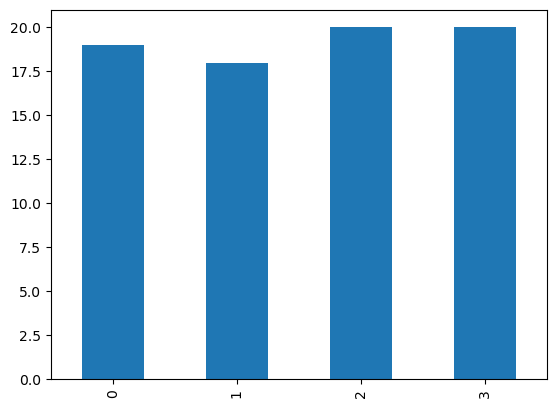

In [7]:
#Program 6
from pyspark.sql import SparkSession

#Memulai Spark Session
spark = SparkSession.builder.appName("Latihan Big Data").getOrCreate()

#Membuat dataframe sederhana
data = [("Hammam", 19), ("Hakkan", 18), ("Assep", 20), ("Rama", 20)]
kolom = ["Nama", "Usia"]
df = spark.createDataFrame(data, kolom)

#Menampilkan Dataframe
df.show()

import pandas as pd

#Membuat dataframe pandas
data_pandas = {
    "Nama": ["Hammam", "Hakkan", "Assep", "Rama"],
    "Usia": [19, 18, 20, 20]
    }
df_pandas = pd.DataFrame(data_pandas)

#Membuat dataframe  kedua
data_pandas_2 = {
    "Nama": ["Hammam", "Hakkan", "Assep", "Rama"],
    "Pekerjaan": ["Manajer", "Programer", "Full Stack Developer", "Software Tester"]
    }
df_pandas_2 = pd.DataFrame(data_pandas_2)

#Join antara dua dataframe
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

#Menghitung statistik deskriptif
print(df_pandas.describe())

#Plotting data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show

# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()